In [1]:
from skimage.filters import threshold_otsu
from PIL import Image
from skimage.morphology import reconstruction
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random, gc, pickle, os
from os.path import exists, isfile, join

In [2]:
def load_folder_list(path=""):
    return [os.path.join(path, o) for o in os.listdir(path) if os.path.isdir(os.path.join(path, o))]

In [3]:
def get_data_path(img_folder):

    img_path = load_folder_list(path = img_folder)
    img_path.sort()

    return img_path

In [4]:
def get_data_name(data_path):

    if exists(data_path):
           data_name = [f for f in os.listdir(data_path) if isfile(join(data_path,f))]
            
    data_name.sort()
    return data_name

In [5]:
def get_data(img_folder):

    path = get_data_path(img_folder)
    label_path = get_data_name(path[0])
    pred_prob_path = get_data_name(path[1])
    pred_org_path = get_data_name(path[2])
    
    lab, pred_prob, pred_org = [], [], []
    
    for p in tqdm(range(len(label_path))):
        lab.append(np.array(Image.open(join(path[0], label_path[p]))))
        pred_prob.append(np.load(join(path[1], pred_prob_path[p])))
        pred_org.append(np.array(Image.open(join(path[2], pred_org_path[p]))))
        
    return lab, pred_prob, pred_org

In [6]:
folder = "../results1"
label, pred_prob, pred_org = get_data(folder)

100%|██████████| 113/113 [00:00<00:00, 158.32it/s]


In [7]:
label = np.asarray(label)
pred_prob = np.asarray(pred_prob)
pred_org = np.asarray(pred_org)
label.shape, pred_prob.shape, pred_org.shape

((113, 512, 512), (113, 512, 512, 2), (113, 512, 512))

In [8]:
np.unique(label), np.unique(pred_org)

(array([  0, 255], dtype=uint8), array([  0, 255], dtype=uint8))

In [9]:
np.unique(pred_prob)

array([0.00000000e+00, 1.63433825e-06, 2.00486357e-06, ...,
       9.99997556e-01, 9.99998011e-01, 9.99998361e-01])

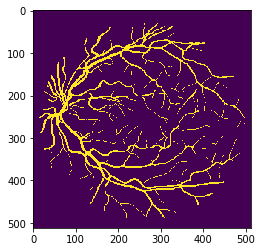

In [10]:
label = (label/255.).astype(np.uint8)
plt.imshow(label[0])

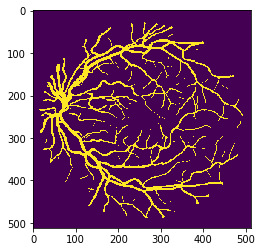

In [11]:
pred_org = (pred_org/255.).astype(np.uint8)
plt.imshow(pred_org[0])

In [12]:
THRESHOLD_0 = 0.4
THRESHOLD_1 = 0.6

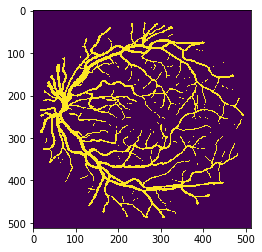

In [13]:
mask = np.where(pred_prob[:, :, :, 1] > THRESHOLD_0, 1., 0.)
plt.imshow(mask[0])

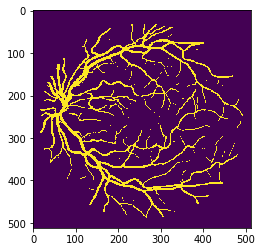

In [14]:
seed = np.where(pred_prob[:, :, :, 1] > THRESHOLD_1, 1., 0.)
plt.imshow(seed[0])

In [15]:
mask.shape, seed.shape

((113, 512, 512), (113, 512, 512))

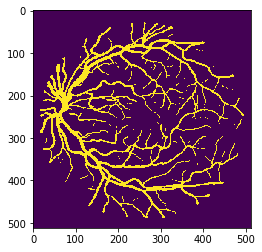

In [16]:
new_pred = reconstruction(seed, mask)
plt.imshow(new_pred[0])

In [17]:
new_pred = (new_pred).astype(np.uint8)
new_pred.shape

(113, 512, 512)

In [18]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix

In [19]:
def confusionMatrix(label, pred):
    tn, fp, fn, tp = confusion_matrix(lab2d, pred).ravel()
    Sensitivity = (tp) / (tp + fn)
    Specificity = (tn) / (tn + fp)
    
    return Sensitivity, Specificity

In [20]:
lab2d = np.reshape(label, (label.shape[0]*512*512))
pred_org2d = np.reshape(pred_org, (pred_org.shape[0]*512*512))
new_pred2d = np.reshape(new_pred, (new_pred.shape[0]*512*512))

In [21]:
accuracy_score(lab2d, new_pred2d), roc_auc_score(lab2d, new_pred2d), f1_score(lab2d, new_pred2d), confusionMatrix(lab2d, new_pred2d)

(0.955217006987175,
 0.926888009597162,
 0.758346904499069,
 (0.8932699512403625, 0.9605060679539614))

In [22]:
accuracy_score(lab2d, pred_org2d), roc_auc_score(lab2d, pred_org2d), f1_score(lab2d, pred_org2d), confusionMatrix(lab2d, pred_org2d)

(0.9623896505980365,
 0.9175466068618101,
 0.7833428363181522,
 (0.8643313080474431, 0.9707619056761772))

# Accuracy according to Dataset

# DRIVE:                         
ACCURACY- 97%, ROC_AUC SCORE- 93%, F1-SCORE- 80%, SENSITIVITY- 88%, SPECIFICITY- 98%
# STARE:                         
ACCURACY- 98%, ROC_AUC SCORE- 94%, F1-SCORE- 83%, SENSITIVITY- 88%, SPECIFICITY- 98%
# CHASEDB1:                      
ACCURACY- 98%, ROC_AUC SCORE- 94%, F1-SCORE- 83%, SENSITIVITY- 89%, SPECIFICITY- 99%
# HIGH RESOLUTION RETINAL IMAGE: 
ACCURACY- 97%, ROC_AUC SCORE- 92%, F1-SCORE- 79%, SENSITIVITY- 86%, SPECIFICITY- 98%